# Statistical Rethinking 
 # Chapter 3: Sampling the Imaginary 
 # Examples and Exercises

In [1]:
import numpy as np
from scipy.stats import describe
from scipy.stats import binom
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
from scipy.stats import gaussian_kde
import pymc3 as pm
from arviz import hdi

# 3.1: Sampling from a grid-approximate posterir

In [2]:
n = 1000
p_grid = np.arange(0, 1, .001)
prior = np.repeat(1, n)
likelihood = binom.pmf(k=6, n=9, p=p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior / sum(unstd_posterior)
#np.set_printoptions(threshold=np.inf)
#np.column_stack((p_grid, likelihood, unstd_posterior, posterior))

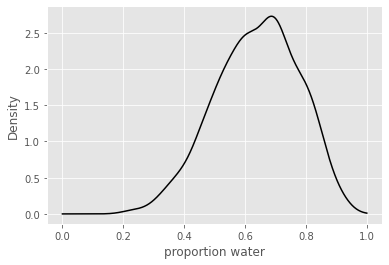

In [3]:
post_sample = np.random.choice(p_grid, size=1000, replace=True, p=posterior)
post_density = gaussian_kde(post_sample)
plt.plot(p_grid, post_density(p_grid), 'k-')
plt.xlabel('proportion water')
plt.ylabel('Density')
plt.show()

# 3.2: Sampling to summarize

In [4]:
post_summary = describe(post_sample)
post_summary.nobs
post_summary.minmax
post_summary.mean
post_summary.variance

0.018468781565565567

In [5]:
sum(posterior[p_grid < 0.5])
sum(post_sample < 0.5)/len(post_sample)
len(post_sample[(post_sample>.5) & (post_sample<.75)])/len(post_sample)

0.611

In [6]:
np.percentile(post_sample, q = (20, 50, 80))
interval = np.percentile(post_sample, q = (25, 75))
section = np.arange(interval[0], interval[1], 1/100)

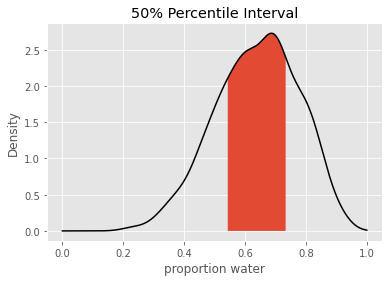

In [7]:
plt.plot(p_grid, post_density(p_grid), 'k-')
plt.fill_between(section, post_density(section))
plt.title('50% Percentile Interval')
plt.xlabel('proportion water')
plt.ylabel('Density')
plt.show()

In [8]:
np.argmax(posterior)
p_grid[np.argmax(posterior)]

0.667

highest posterior density interval [outsourcing :)]

In [9]:
hdi(post_sample, alpha=0.5)

array([0.379, 0.868])

maybe include exmple with loss function 

# 3.3: Sampling to simulate prediction

(nothing new here)